## 합성곱 신경망

### 패션 MNIST CNN

- 

In [1]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [2]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [3]:
train_input.shape

(60000, 28, 28)

In [4]:
# 255.0 - 정규화처리
# reshape(-1, 28, 28, 1) - 4차원 배열로 변경
train_scaled = train_input.reshape(-1, 28, 28, 1) / 255.0

In [5]:
train_scaled.shape

(60000, 28, 28, 1)

In [6]:
test_scaled = test_input.reshape(-1, 28, 28, 1) / 255.0

In [7]:
test_scaled.shape

(10000, 28, 28, 1)

- train_scaled에서 1차원을 더 추가한 이유
- channel 값 : 흑백이기 때문에 1채널만 있으면 됨
    - 60000(데이터수), 28(이미지높이), 1(입력채널)

In [8]:
## 훈련세트, 검증세트 분리
train_scaled, val_scaled, train_target, val_target = train_test_split(
    train_scaled, train_target, test_size=0.2, random_state=42
)

In [9]:
print(train_scaled.shape, val_scaled.shape)
print(train_target.shape, val_target.shape)

(48000, 28, 28, 1) (12000, 28, 28, 1)
(48000,) (12000,)


### 합성곱 신경망 만들기

In [10]:
model = keras.Sequential(name='CNN1')

# 32 -> 합성곱 층의 필터 갯수
# kernel_size=3 -> (3x3)
# padding='same' -> 패딩 추가해서 특성맵사이즈를 원본과 동일하게

model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28,28,1)))

In [11]:
model.add(keras.layers.MaxPooling2D(2)) # 특성맵이 반으로 줄어듬. 14x14 사이즈의 특성맵

In [12]:
model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 14, 14, 32)        0         
 D)                                                              
                                                                 
Total params: 320 (1.25 KB)
Trainable params: 320 (1.25 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [13]:
# 두번째 합성곱/풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same'))
model.add(keras.layers.MaxPooling2D(2)) # 사이즈 반으로, 7x7x64 특성맵 -> 3136 출력

In [14]:
# 심층신경망을 붙임
model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dropout(0.4))
model.add(keras.layers.Dense(10, activation='softmax'))

- 하나의 셀로 합침

In [15]:
model = keras.Sequential(name='CNN1')

# 32 -> 합성곱 층의 필터 갯수
# kernel_size, 3 -> (3x3)
# padding, same -> 패딩 추가해서 특성맵사이즈를 원본과 동일하게
model.add(keras.layers.Conv2D(32, kernel_size=3, activation='relu', padding='same', input_shape=(28, 28, 1), name='First_CNN'))
model.add(keras.layers.MaxPooling2D(2))   # 특성맵이 반으로 줄어듬. 14x14 사이즈의 특성맵

# 두번째 합성곱/풀링층 추가
model.add(keras.layers.Conv2D(64, kernel_size=3, activation='relu', padding='same', name='Secound_CNN'))
model.add(keras.layers.MaxPooling2D(2))  # 사이즈 반으로, 7x7x64 특성맵 -> 3136 출력

# 심층신경망을 붙임
model.add(keras.layers.Flatten(name='Flatten'))
model.add(keras.layers.Dense(100, activation='relu', name='Hidden'))
model.add(keras.layers.Dropout(0.4, name='Dropout'))  
model.add(keras.layers.Dense(10, activation='softmax', name='Output'))

model.summary()

Model: "CNN1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 First_CNN (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 32)        0         
 g2D)                                                            
                                                                 
 Secound_CNN (Conv2D)        (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 Flatten (Flatten)           (None, 3136)              0         
                                                                 
 Hidden (Dense)              (None, 100)               313700 

- graphviz설치
- pydot 파이썬 모듈 설치
- VS Code 재시작

In [16]:
!pip install pydot


[notice] A new release of pip is available: 24.0 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
# 모델 시각화(안됨)
keras.utils.plot_model(model)

#### 모델 컴파일, 훈련

In [21]:
# 모델 컴파일
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('best-cnn-model.h5', save_best_only=True)
early_stopping_cb = keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True)

In [22]:
# 모델 훈련
history = model.fit(train_scaled, train_target, epochs=50, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/50


1500/1500 [==============================] - 13s 8ms/step - loss: 0.5160 - accuracy: 0.8141 - val_loss: 0.3143 - val_accuracy: 0.8838
Epoch 2/50
  14/1500 [..............................] - ETA: 12s - loss: 0.3577 - accuracy: 0.8817

c:\Source\iot-dataanalysis-2025\mlvenv\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


1500/1500 [==============================] - 12s 8ms/step - loss: 0.3453 - accuracy: 0.8771 - val_loss: 0.2772 - val_accuracy: 0.8961
Epoch 3/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2958 - accuracy: 0.8938 - val_loss: 0.2519 - val_accuracy: 0.9078
Epoch 4/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2638 - accuracy: 0.9047 - val_loss: 0.2489 - val_accuracy: 0.9091
Epoch 5/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2423 - accuracy: 0.9105 - val_loss: 0.2241 - val_accuracy: 0.9167
Epoch 6/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2201 - accuracy: 0.9205 - val_loss: 0.2311 - val_accuracy: 0.9157
Epoch 7/50
1500/1500 [==============================] - 12s 8ms/step - loss: 0.2034 - accuracy: 0.9249 - val_loss: 0.2298 - val_accuracy: 0.9159


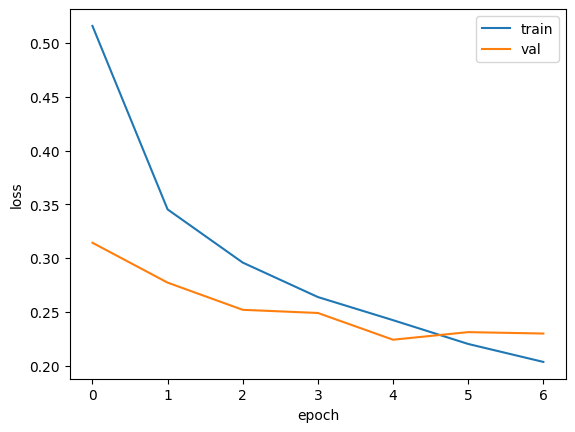

In [24]:
# 정확도 확인
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [25]:
# 모델 검증 정확도
model.evaluate(val_scaled, val_target)

375/375 [==============================] - 1s 2ms/step - loss: 0.2241 - accuracy: 0.9167


[0.22407498955726624, 0.9166666865348816]

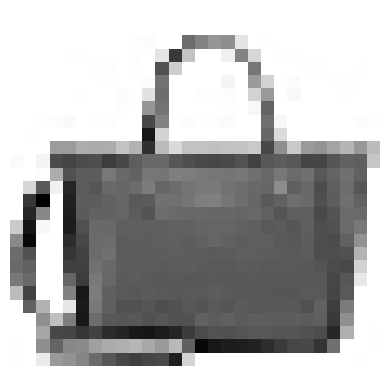

In [26]:
# val_scaled[0]
plt.imshow(val_scaled[0].reshape(28, 28), cmap='gray_r')
plt.axis('off')
plt.show()

In [30]:
model.predict(val_scaled[0:1]).round(3)

1/1 [==============================] - 0s 13ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 1., 0.]], dtype=float32)

#### 예측시각화

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [32]:
# 한글로 Matplotlib 사용시 항상 필요
from matplotlib import rcParams, font_manager, rc

font_path = 'C:/Windows/Fonts/malgun.ttf'
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)
rcParams['axes.unicode_minus'] = False

sns.set_style('darkgrid')
sns.set_theme(font='Malgun Gothic', rc={'axes.unicode_minus': False})

In [33]:
class_names = ['티셔츠', '바지', '스웨터', '드레스', '코트', '샌달', '셔츠', '스니커즈', '가방', '앵클부츠']

In [34]:
pred_result = model.predict(test_scaled)

313/313 [==============================] - 1s 2ms/step
